# Imports

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely import wkt
import networkx as nx
import dill
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import ast
import utils_pre_processing as upp
from utils_pre_processing import split_col_to_and_from
# Show all columns when using .head()
pd.set_option('display.max_columns', None)

# Reading data

In [106]:
iggielgn_borderpoints = pd.read_csv('IGGIELGN/IGGIELGN_BorderPoints.csv', delimiter=';')
iggielgn_compressors = pd.read_csv('IGGIELGN/IGGIELGN_Compressors.csv', delimiter=';')
iggielgn_consumers = pd.read_csv('IGGIELGN/IGGIELGN_Consumers.csv', delimiter=';')
iggielgn_lngs = pd.read_csv('IGGIELGN/IGGIELGN_LNGs.csv', delimiter=';')
iggielgn_nodes = pd.read_csv('IGGIELGN/IGGIELGN_Nodes.csv', delimiter=';')
iggielgn_pipesegments = pd.read_csv('IGGIELGN/IGGIELGN_PipeSegments.csv', delimiter=';')
iggielgn_productions = pd.read_csv('IGGIELGN/IGGIELGN_Productions.csv', delimiter=';')
iggielgn_storages = pd.read_csv('IGGIELGN/IGGIELGN_Storages.csv', delimiter=';')

# Pre-processing columns

## Pipe Segments

In [107]:
# Expanding param, uncertainty and method columns
iggielgn_pipesegments = upp.split_column_to_multiple(iggielgn_pipesegments, 'param')
iggielgn_pipesegments = upp.split_column_to_multiple(iggielgn_pipesegments, 'uncertainty', 'uncertainty_')
iggielgn_pipesegments = upp.split_column_to_multiple(iggielgn_pipesegments, 'method', 'method_')

# Splitting node_id, country_code, lat and long columns
iggielgn_pipesegments = upp.split_col_to_and_from(iggielgn_pipesegments, 'node_id', 'str')
iggielgn_pipesegments = upp.split_col_to_and_from(iggielgn_pipesegments, 'country_code', 'str')
iggielgn_pipesegments = upp.split_coords(iggielgn_pipesegments, 'lat')
iggielgn_pipesegments = upp.split_coords(iggielgn_pipesegments, 'long')

## Border Points

In [108]:
# Convert values in the node_id col of iggielgn_borderpoints from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_borderpoints['node_id'] = iggielgn_borderpoints['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Rename the country_code column to country_code_node
iggielgn_borderpoints.rename(columns={'country_code': 'country_code_node'}, inplace=True)

# Expanding param, uncertainty and method columns
iggielgn_borderpoints = upp.split_column_to_multiple(iggielgn_borderpoints, 'param')
iggielgn_borderpoints = upp.split_column_to_multiple(iggielgn_borderpoints, 'uncertainty', 'uncertainty_')
iggielgn_borderpoints = upp.split_column_to_multiple(iggielgn_borderpoints, 'method', 'method_')

## Compressors

In [109]:
# Convert values in the node_id col of iggielgn_compressors from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_compressors['node_id'] = iggielgn_compressors['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_compressors = upp.split_column_to_multiple(iggielgn_compressors, 'param')
iggielgn_compressors = upp.split_column_to_multiple(iggielgn_compressors, 'uncertainty', 'uncertainty_')
iggielgn_compressors = upp.split_column_to_multiple(iggielgn_compressors, 'method', 'method_')

## LNGs

In [110]:
# Convert values in the node_id col of iggielgn_lngs from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_lngs['node_id'] = iggielgn_lngs['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_lngs = upp.split_column_to_multiple(iggielgn_lngs, 'param')
iggielgn_lngs = upp.split_column_to_multiple(iggielgn_lngs, 'uncertainty', 'uncertainty_')
iggielgn_lngs = upp.split_column_to_multiple(iggielgn_lngs, 'method', 'method_')

## Consumers

In [111]:
# Convert values in the node_id col of iggielgn_consumers from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_consumers['node_id'] = iggielgn_consumers['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_consumers = upp.split_column_to_multiple(iggielgn_consumers, 'param')
iggielgn_consumers = upp.split_column_to_multiple(iggielgn_consumers, 'uncertainty', 'uncertainty_')
iggielgn_consumers = upp.split_column_to_multiple(iggielgn_consumers, 'method', 'method_')

## Productions

In [112]:
# Convert values in the node_id col of iggielgn_productions from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_productions['node_id'] = iggielgn_productions['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_productions = upp.split_column_to_multiple(iggielgn_productions, 'param')
iggielgn_productions = upp.split_column_to_multiple(iggielgn_productions, 'uncertainty', 'uncertainty_')
iggielgn_productions = upp.split_column_to_multiple(iggielgn_productions, 'method', 'method_')

## Storages

In [113]:
# Convert values in the node_id col of iggielgn_storages from ['INET_CS_0'] to INET_CS_0. It is a string, so you need to evaluate it first
iggielgn_storages['node_id'] = iggielgn_storages['node_id'].apply(lambda x: ast.literal_eval(x)[0])

# Expanding param, uncertainty and method columns
iggielgn_storages = upp.split_column_to_multiple(iggielgn_storages, 'param')
iggielgn_storages = upp.split_column_to_multiple(iggielgn_storages, 'uncertainty', 'uncertainty_')
iggielgn_storages = upp.split_column_to_multiple(iggielgn_storages, 'method', 'method_')

## Nodes

In [114]:
# Expanding param, uncertainty and method columns
iggielgn_nodes = upp.split_column_to_multiple(iggielgn_nodes, 'param')
iggielgn_nodes = upp.split_column_to_multiple(iggielgn_nodes, 'uncertainty', 'uncertainty_')
iggielgn_nodes = upp.split_column_to_multiple(iggielgn_nodes, 'method', 'method_')

# Add a "type" column to iggielgn_nodes, a list of the type of the node
iggielgn_nodes['type'] = ''

for row in iggielgn_nodes.itertuples():
    iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + 'node'
    if row.id in iggielgn_consumers['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', consumer'
    if row.id in iggielgn_productions['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', production'
    if row.id in iggielgn_storages['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', storage'
    if row.id in iggielgn_compressors['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', compressor'
    if row.id in iggielgn_lngs['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', lng'
    if row.id in iggielgn_borderpoints['node_id'].values:
        iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'type'] + ', borderpoint'

## Updating missing country_codes

In [115]:
# Read data/iggielgn_nodes_country_codes.csv to a DataFrame and add the country_code column to iggielgn_nodes
iggielgn_nodes_country_codes = pd.read_csv('data/iggielgn_nodes_country_codes.csv', delimiter=',')
iggielgn_nodes['country_code'] = iggielgn_nodes_country_codes['country_code']

In [116]:
# Iterate over the rows of iggielgn_pipesegments and update the to_country_code and from_country_code columns for the rows where either column has "XX"
for row in iggielgn_pipesegments.itertuples():
    if row.from_country_code == 'XX':
        iggielgn_pipesegments.loc[iggielgn_pipesegments['id'] == row.id, 'from_country_code'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.from_node_id, 'country_code'].values[0]
    if row.to_country_code == 'XX':
        iggielgn_pipesegments.loc[iggielgn_pipesegments['id'] == row.id, 'to_country_code'] = iggielgn_nodes.loc[iggielgn_nodes['id'] == row.to_node_id, 'country_code'].values[0]


In [117]:
# # Plot these nodes on the map
# fig, ax = plt.subplots(figsize=(16, 16))

# # Use BaseMap to underlay a map of Europe
# m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
# m.drawcoastlines()
# m.drawcountries()
# m.fillcontinents(color='lightgray')

# # Plot the nodes with country_code == XX
# for row in iggielgn_nodes.itertuples():
#     if row.country_code == 'XX':
#         x, y = m(row.long, row.lat)
#         m.plot(x, y, 'ro', markersize=5)
#     else:
#         x, y = m(row.long, row.lat)
#         m.plot(x, y, 'bo', markersize=5)

# plt.show()

In [118]:
# # Load data/country_geometries/dz.json into a GeoDataFrame
# dz = gpd.read_file('data/country_geometries/dz.json')
# # Load data/country_geometries/tn.json into a GeoDataFrame
# tn = gpd.read_file('data/country_geometries/tn.json')
# # Load data/country_geometries/ly.json into a GeoDataFrame
# ly = gpd.read_file('data/country_geometries/ly.json')
# # Load data/country_geometries/kz.json into a GeoDataFrame
# kz = gpd.read_file('data/country_geometries/kz.json')
# # Load data/country_geometries/ru.json into a GeoDataFrame
# ru = gpd.read_file('data/country_geometries/ru.json')
# # Load data/country_geometries/eg.json into a GeoDataFrame
# eg = gpd.read_file('data/country_geometries/eg.json')
# # Load data/country_geometries/no_eez.json into a GeoDataFrame
# no_eez = gpd.read_file('data/country_geometries/no_eez.json')
# # Load data/country_geometries/dk_eez.json into a GeoDataFrame
# dk_eez = gpd.read_file('data/country_geometries/dk_eez.json')
# # Load data/country_geometries/gb_eez.json into a GeoDataFrame
# gb_eez = gpd.read_file('data/country_geometries/gb_eez.json')
# # Load data/country_geometries/nl_eez.json into a GeoDataFrame
# nl_eez = gpd.read_file('data/country_geometries/nl_eez.json')
# # Load data/country_geometries/ru_eez.json into a GeoDataFrame
# ru_eez = gpd.read_file('data/country_geometries/ru_eez.json')
# # Load data/country_geometries/eg_eez.json into a GeoDataFrame
# eg_eez = gpd.read_file('data/country_geometries/eg_eez.json')
# # Load data/country_geometries/de_eez.json into a GeoDataFrame
# de_eez = gpd.read_file('data/country_geometries/de_eez.json')
# # Load data/country_geometries/ua_eez.json into a GeoDataFrame
# ua_eez = gpd.read_file('data/country_geometries/ua_eez.json')
# # Load data/country_geometries/ro_eez.json into a GeoDataFrame
# ro_eez = gpd.read_file('data/country_geometries/ro_eez.json')
# # Load data/country_geometries/tn_eez.json into a GeoDataFrame
# tn_eez = gpd.read_file('data/country_geometries/tn_eez.json')
# # Load data/country_geometries/ly_eez.json into a GeoDataFrame
# ly_eez = gpd.read_file('data/country_geometries/ly_eez.json')
# # Load data/country_geometries/it_eez.json into a GeoDataFrame
# it_eez = gpd.read_file('data/country_geometries/it_eez.json')
# # Load data/country_geometries/ie_eez.json into a GeoDataFrame
# ie_eez = gpd.read_file('data/country_geometries/ie_eez.json')
# # Load data/country_geometries/ir.json into a GeoDataFrame
# ir = gpd.read_file('data/country_geometries/ir.json')
# # Load data/country_geometries/iq.json into a GeoDataFrame
# iq = gpd.read_file('data/country_geometries/iq.json')
# # Load data/country_geometries/sy.json into a GeoDataFrame
# sy = gpd.read_file('data/country_geometries/sy.json')
# # Load data/country_geometries/il.json into a GeoDataFrame
# il = gpd.read_file('data/country_geometries/il.json')
# # Load data/country_geometries/jo.json into a GeoDataFrame
# jo = gpd.read_file('data/country_geometries/jo.json')
# # Load data/country_geometries/il_eez.json into a GeoDataFrame
# il_eez = gpd.read_file('data/country_geometries/il_eez.json')
# # Load data/country_geometries/ps.json into a GeoDataFrame
# ps = gpd.read_file('data/country_geometries/ps.json')
# # Load data/country_geometries/ge.json into a GeoDataFrame
# ge = gpd.read_file('data/country_geometries/ge.json')
# # Load data/country_geometries/ge_eez.json into a GeoDataFrame
# ge_eez = gpd.read_file('data/country_geometries/ge_eez.json')
# # Load data/country_geometries/lb.json into a GeoDataFrame
# lb = gpd.read_file('data/country_geometries/lb.json')
# # Load data/country_geometries/lb_eez.json into a GeoDataFrame
# lb_eez = gpd.read_file('data/country_geometries/lb_eez.json')

In [119]:
# # Plot these nodes on the map
# fig, ax = plt.subplots(figsize=(16, 16))

# # Use BaseMap to underlay a map of Europe
# m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
# m.drawcoastlines()
# m.drawcountries()
# m.fillcontinents(color='lightgray')

# # For nodes with country_code == XX, check if they are in Algeria
# for row in iggielgn_nodes.itertuples():
#     if row.country_code == 'XX':
#         point = wkt.loads(f'POINT({row.long} {row.lat})')
#         if dz['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'DZ'
#         elif tn['geometry'].contains(point).any() or tn_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'TN'
#         elif ly['geometry'].contains(point).any() or ly_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'LY'
#         elif kz['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             try:
#                 m.plot(x, y, 'ko', markerssize=5)
#             except:
#                 print(row.long, row.lat)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'KZ'
#         elif ru['geometry'].contains(point).any() or ru_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'RU'
#         elif row.id.split('_')[0] == 'NO':
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'NO'
#         elif eg['geometry'].contains(point).any() or eg_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'EG'
#         elif no_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'NO'
#         elif dk_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'DK'
#         elif gb_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'GB'
#         elif nl_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'NL'
#         elif de_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'DE'
#         elif ua_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'UA'
#         elif ro_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'RO'
#         elif it_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'IT'
#         elif ie_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'IE'
#         elif ir['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'IR'
#         elif iq['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'IQ'
#         elif sy['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'SY'
#         elif il['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'IL'
#         elif jo['geometry'].contains(point).any() or il_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'JO'
#         elif ps['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'PS'
#         elif ge['geometry'].contains(point).any() or ge_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'GE'
#         elif lb['geometry'].contains(point).any() or lb_eez['geometry'].contains(point).any():
#             x, y = m(row.long, row.lat)
#             m.plot(x, y, 'ko', markersize=5)
#             iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = 'LB'
        
# plt.show()

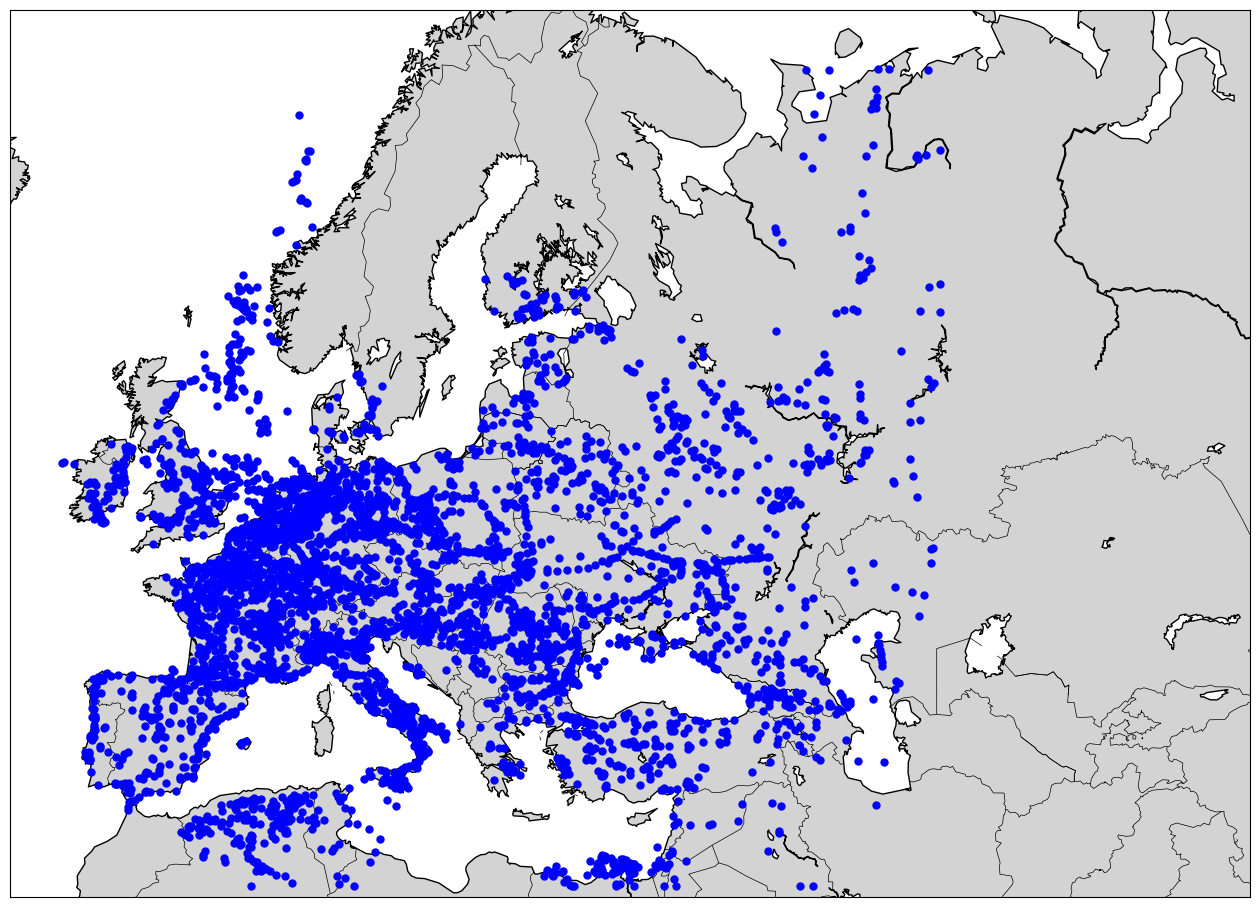

In [120]:
# Plot these nodes on the map
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes with country_code == XX
for row in iggielgn_nodes.itertuples():
    if row.country_code == 'XX':
        x, y = m(row.long, row.lat)
        m.plot(x, y, 'ro', markersize=5)
    else:
        x, y = m(row.long, row.lat)
        m.plot(x, y, 'bo', markersize=5)

plt.show()

In [121]:
# # For the remaining nodes with country_code == XX, plot each one, prompt the user to input the country_code, and update the GeoDataFrame
# for row in iggielgn_nodes.itertuples():
#     if row.country_code == 'XX':
#         fig, ax = plt.subplots(figsize=(16, 16))

#         # Use BaseMap to underlay a map of Europe
#         m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
#         m.drawcoastlines()
#         m.drawcountries()
#         m.fillcontinents(color='lightgray')

#         x, y = m(row.long, row.lat)
#         m.plot(x, y, 'ro', markersize=5)

#         plt.show()

#         country_code = input('Enter the country code: ')

#         iggielgn_nodes.loc[iggielgn_nodes['id'] == row.id, 'country_code'] = country_code

In [122]:
# # Save, as a CSV file, the id and country_code columns of iggielgn_nodes
# iggielgn_nodes[['id', 'country_code']].to_csv('data/iggielgn_nodes_country_codes.csv', index=False)

# Plotting the nodes

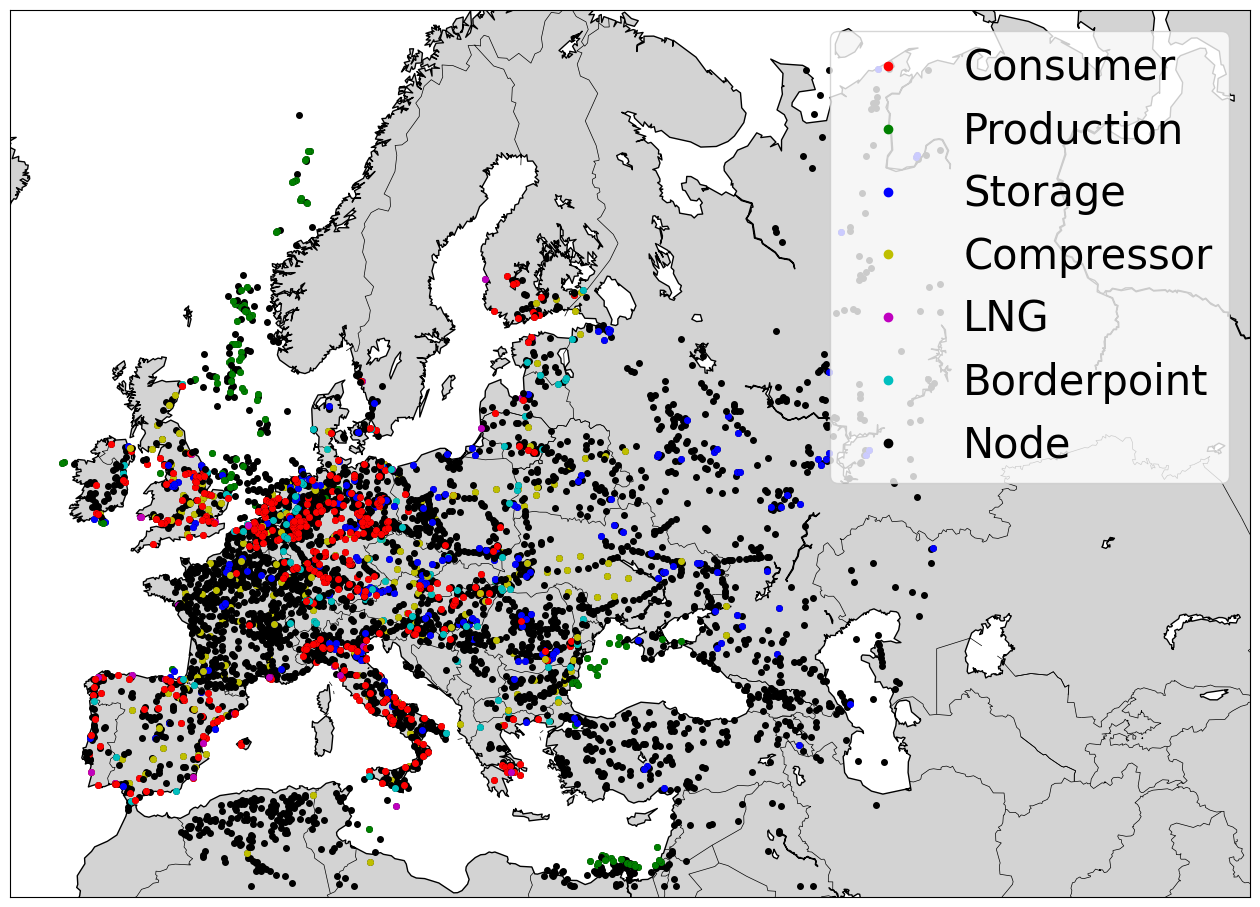

In [136]:
# Plot the nodes on the map
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes, and color based on the type
for row in iggielgn_nodes.itertuples():
    x, y = m(row.long, row.lat)
    # If row.type contains "consumer", color red
    if 'node' in row.type:
        m.plot(x, y, 'ko', markersize=4)
    if 'consumer' in row.type:
        m.plot(x, y, 'ro', markersize=4)
    if 'production' in row.type:
        m.plot(x, y, 'go', markersize=4)
    if 'storage' in row.type:
        m.plot(x, y, 'bo', markersize=4)
    if 'compressor' in row.type:
        m.plot(x, y, 'yo', markersize=4)
    if 'lng' in row.type:
        m.plot(x, y, 'mo', markersize=4)
    if 'borderpoint' in row.type:
        m.plot(x, y, 'co', markersize=4)


# Add legend
plt.plot([], [], 'ro', label='Consumer')
plt.plot([], [], 'go', label='Production')
plt.plot([], [], 'bo', label='Storage')
plt.plot([], [], 'yo', label='Compressor')
plt.plot([], [], 'mo', label='LNG')
plt.plot([], [], 'co', label='Borderpoint')
plt.plot([], [], 'ko', label='Node')

plt.legend(loc='upper right', fontsize=30)

plt.savefig('latex_figures/iggielgn_components_map.png', bbox_inches='tight')

plt.show()

# Creating the NetworkX graph

In [124]:
# Create a networkx graph using the nodes_df as nodes and the pipe_segments_df as edges
G_multi_directed = nx.MultiDiGraph()

# Add nodes to the graph
for index, row in iggielgn_nodes.iterrows():
    # Get the columns of the row, and add the columns as attributes to the node
    attributes = dict(row)
    G_multi_directed.add_node(row['id'], **attributes)

# Add edges to the graph
for index, row in iggielgn_pipesegments.iterrows():
    # Get the columns of the row, and add the columns as attributes to the edge
    attributes = dict(row)
    G_multi_directed.add_edge(row['from_node_id'], row['to_node_id'], **attributes)

# Iterate over the edges once more: if the is_bothDirection is 1.0, add the edge in the opposite direction
for index, row in iggielgn_pipesegments.iterrows():
    if row['is_bothDirection'] == 1.0:
        G_multi_directed.add_edge(row['to_node_id'], row['from_node_id'], **dict(row))

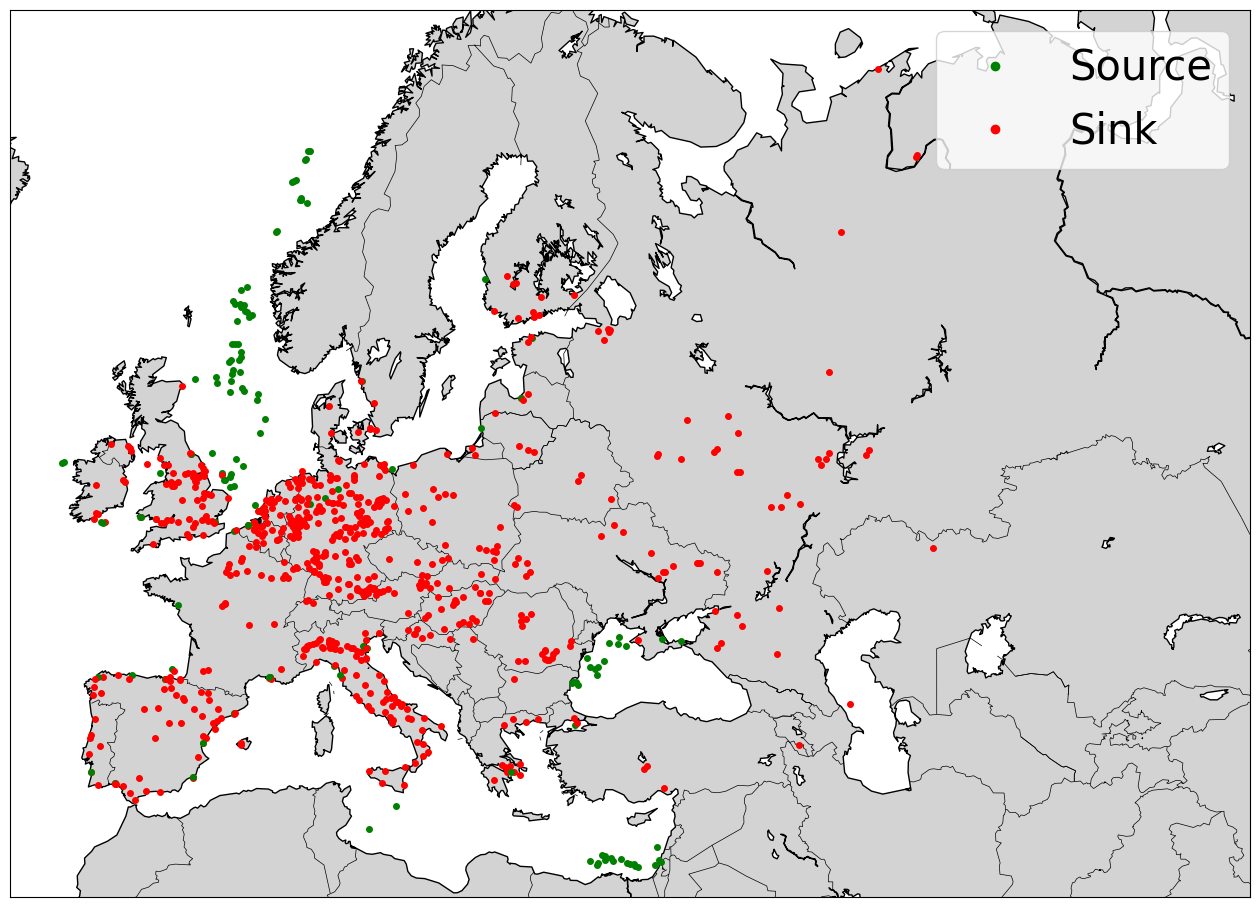

In [125]:
# Plot the nodes on the map
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes, and color based on the type
for row in iggielgn_nodes.itertuples():
    x, y = m(row.long, row.lat)
    if 'consumer' in row.type or 'storage' in row.type:    
        m.plot(x, y, 'ro', markersize=4)
    if 'production' in row.type or 'lng' in row.type:
        m.plot(x, y, 'go', markersize=4)
    
plt.plot([], [], 'go', label='Source')
plt.plot([], [], 'ro', label='Sink')
plt.legend(loc='upper right', fontsize=30)

# Save the figure
plt.savefig('latex_figures/iggielgn_nodes_sources_sinks_component_based.png', bbox_inches='tight')

plt.show()

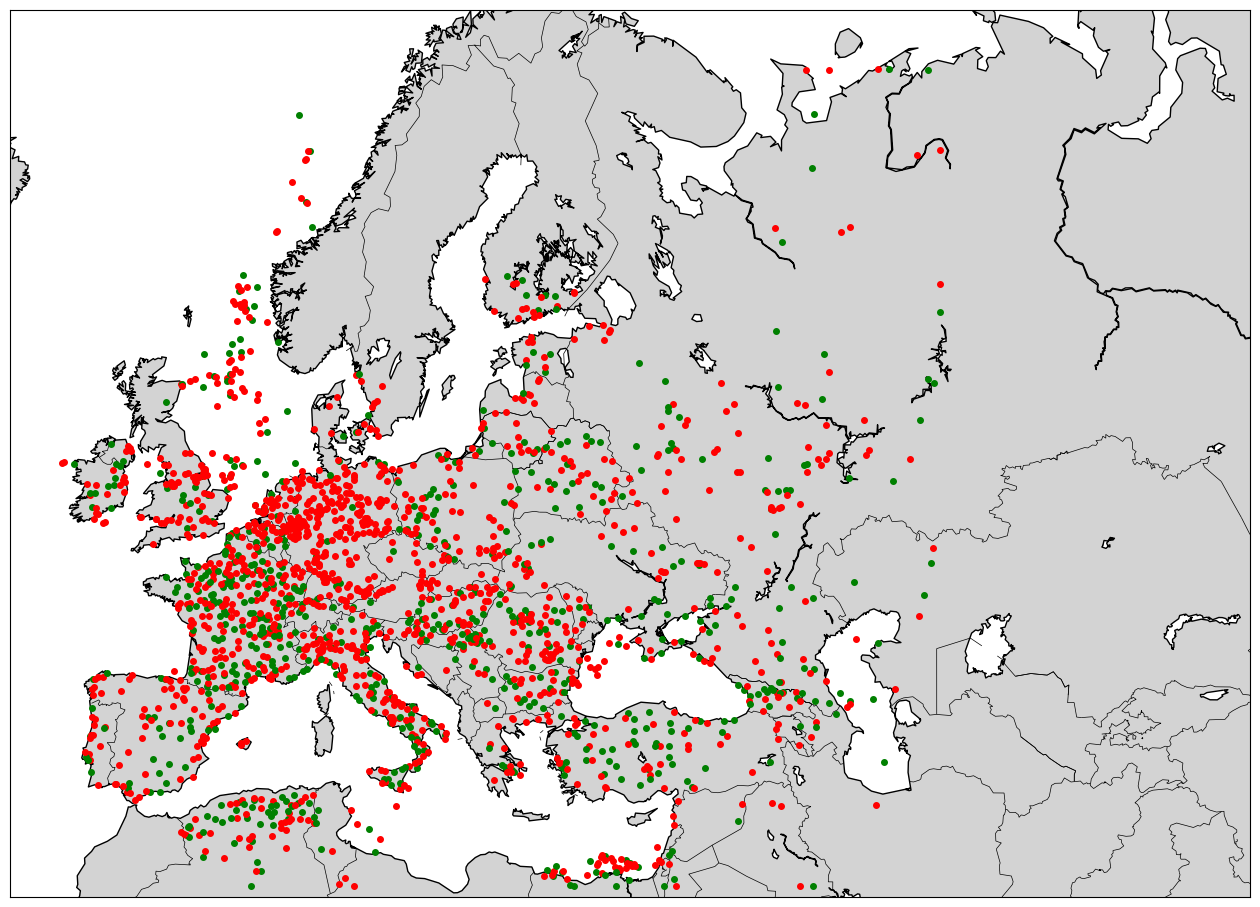

In [126]:
# Plot the nodes of the network: if the node has indegree = 0, mark it green (source), if outdegree = 0, mark it red (sink)
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes, and color based on the type
for row in iggielgn_nodes.itertuples():
    x, y = m(row.long, row.lat)
    if G_multi_directed.in_degree(row.id) == 0:
        m.plot(x, y, 'go', markersize=4)
    if G_multi_directed.out_degree(row.id) == 0:
        m.plot(x, y, 'ro', markersize=4)

# Save the figure
plt.savefig('latex_figures/iggielgn_nodes_sources_sinks_degree_based.png', bbox_inches='tight')

plt.show()

# Defining sinks and sources

In [127]:
# Give the nodes a new attribute, 'flow_type', which can be either 'sink', 'source' or 'transit'

# First, set all nodes to transit
for node in G_multi_directed.nodes():
    G_multi_directed.nodes[node]['flow_type'] = 'transit'

# Then, set the nodes that are consumers to sink
for node in iggielgn_consumers['node_id']:
    G_multi_directed.nodes[node]['flow_type'] = 'sink'

# Set the nodes with type 'storage' to sink
for node in G_multi_directed.nodes():
    if 'storage' in G_multi_directed.nodes[node]['type']:
        G_multi_directed.nodes[node]['flow_type'] = 'sink'

# Then, set the nodes that are productions to source
for node in iggielgn_productions['node_id']:
    G_multi_directed.nodes[node]['flow_type'] = 'source'

# Set the nodes with type 'lng' to source
for node in G_multi_directed.nodes():
    if 'lng' in G_multi_directed.nodes[node]['type']:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

# Then, set the nodes that are in Norway with in-degree 0 to source
for node in G_multi_directed.nodes():
    if G_multi_directed.nodes[node]['country_code'] == 'NO' and G_multi_directed.in_degree(node) == 0:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

# Then, set the nodes that are in Russia with in-degree 0 to source
for node in G_multi_directed.nodes():
    if G_multi_directed.nodes[node]['country_code'] == 'RU' and G_multi_directed.in_degree(node) == 0:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

# Then, set the nodes that are in Algeria with in-degree 0 to source
for node in G_multi_directed.nodes():
    if G_multi_directed.nodes[node]['country_code'] == 'DZ' and G_multi_directed.in_degree(node) == 0:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

# Then, set the nodes that are in Libya with in-degree 0 to source
for node in G_multi_directed.nodes():
    if G_multi_directed.nodes[node]['country_code'] == 'LY' and G_multi_directed.in_degree(node) == 0:
        G_multi_directed.nodes[node]['flow_type'] = 'source'

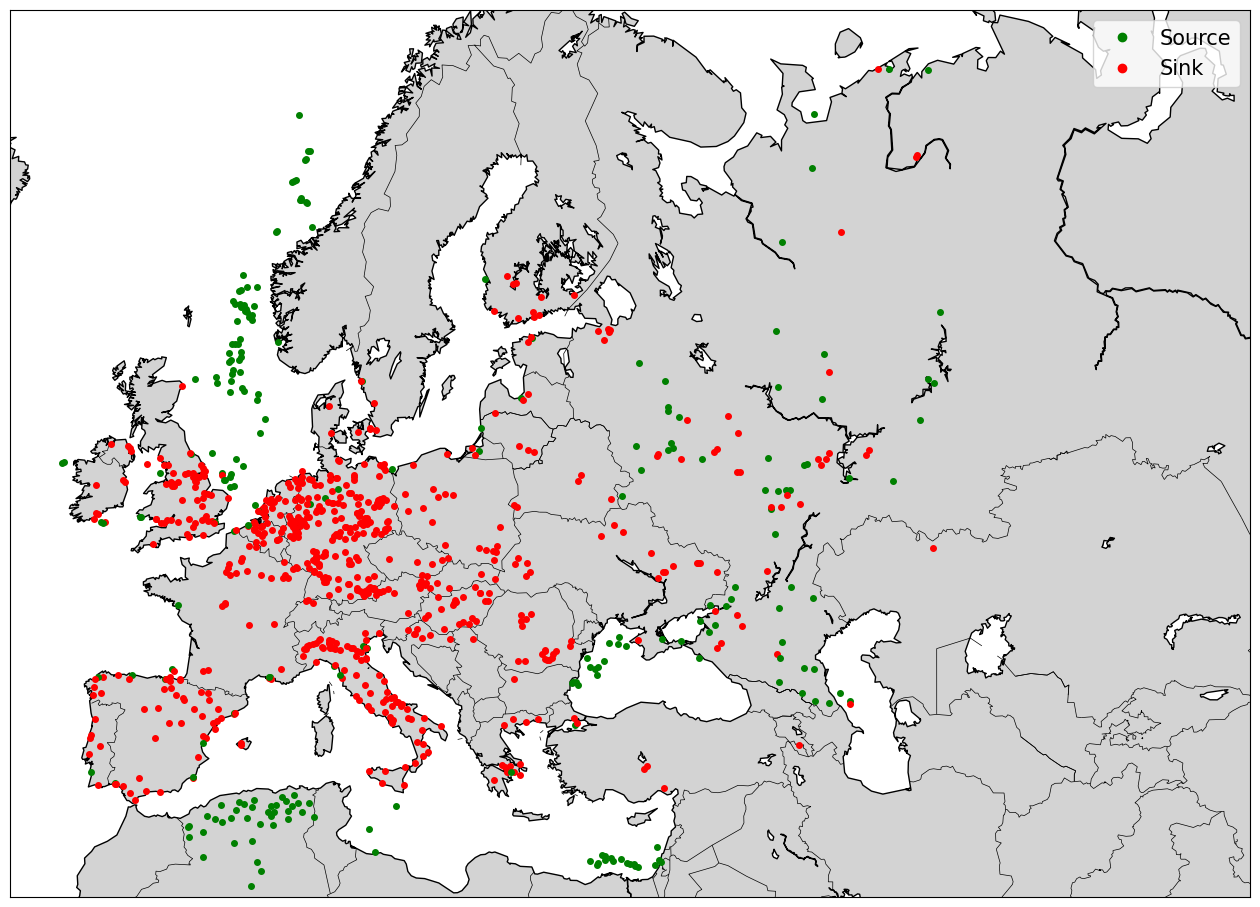

In [128]:
# Plot the nodes of the network, coloring each node basedd on its 'flow_type' attribute
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes, and color based on the flow_type
for node in G_multi_directed.nodes(data=True):
    x, y = m(node[1]['long'], node[1]['lat'])
    if node[1]['flow_type'] == 'source':
        m.plot(x, y, 'go', markersize=4)
    if node[1]['flow_type'] == 'sink':
        m.plot(x, y, 'ro', markersize=4)
    # if node[1]['flow_type'] == 'transit':
    #     m.plot(x, y, 'bo', markersize=4)

# Add legend
plt.plot([], [], 'go', label='Source')
plt.plot([], [], 'ro', label='Sink')
# plt.plot([], [], 'bo', label='Transit')
plt.legend(loc='upper right', fontsize=15)

plt.savefig('latex_figures/iggielgn_sinks_sources.png', bbox_inches='tight')

plt.show()


# Saving graph-versions

In [129]:
# Create a simple directed graph, a multi undirected graph, and a simple undirected graph from the directed multigraph

# Aggregating the edges with the same from_node_id and to_node_id, and aggregating the capacity attribute of the edges
G_simple_directed = nx.DiGraph()
for from_node in G_multi_directed.nodes:
    for to_node in G_multi_directed.nodes:
        if G_multi_directed.has_edge(from_node, to_node):
            edge_attrs = G_multi_directed[from_node][to_node][0]
            if G_simple_directed.has_edge(from_node, to_node):
                G_simple_directed[from_node][to_node]['max_cap_M_m3_per_d'] += edge_attrs['max_cap_M_m3_per_d']
            else:
                G_simple_directed.add_node(from_node, **G_multi_directed.nodes[from_node])
                G_simple_directed.add_node(to_node, **G_multi_directed.nodes[to_node])
                G_simple_directed.add_edge(from_node, to_node, name=edge_attrs['name'], max_cap_M_m3_per_d=edge_attrs['max_cap_M_m3_per_d'], length_km=edge_attrs['length_km'], diameter_mm=edge_attrs['diameter_mm'], is_H_gas=edge_attrs['is_H_gas'], is_bothDirection=edge_attrs['is_bothDirection'], start_year=edge_attrs['start_year'], end_year=edge_attrs['end_year'], from_country_code=edge_attrs['from_country_code'], to_country_code=edge_attrs['to_country_code'])

G_multi_undirected = nx.MultiGraph(G_multi_directed)
G_simple_undirected = nx.Graph(G_multi_directed)

In [130]:
# Saving the multi di-graph to a pickle file
with open('graph_objects/G_multi_directed_iggielgn.pickle', 'wb') as file:
    dill.dump(G_multi_directed, file)

# Saving the simple di-graph to a pickle file
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'wb') as file:
    dill.dump(G_simple_directed, file)

# Saving the multi un-graph to a pickle file
with open('graph_objects/G_multi_undirected_iggielgn.pickle', 'wb') as file:
    dill.dump(G_multi_undirected, file)

# Saving the simple un-graph to a pickle file
with open('graph_objects/G_simple_undirected_iggielgn.pickle', 'wb') as file:
    dill.dump(G_simple_undirected, file)

# Plotting the graph

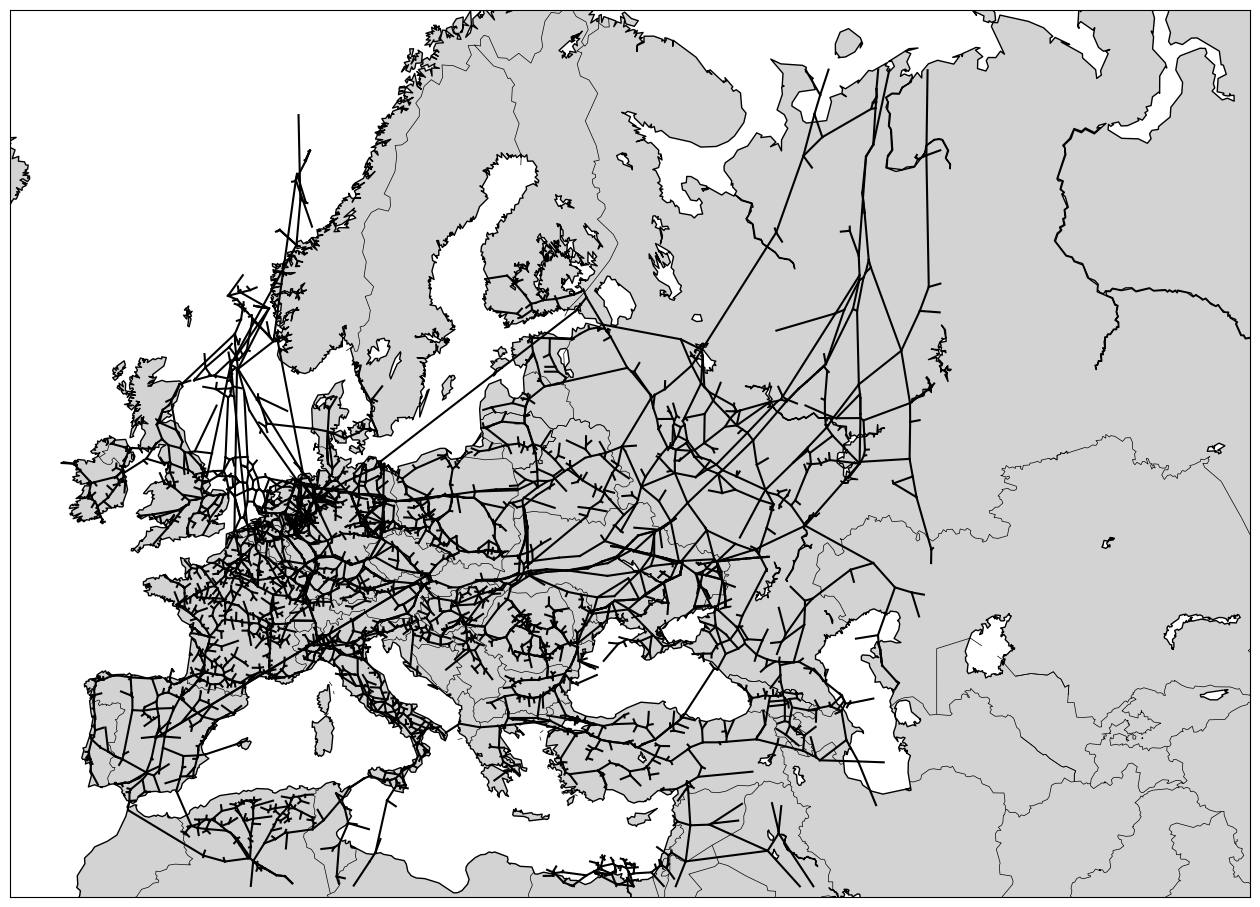

In [131]:
# Plot the graph
fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the edges
for edge in G_multi_directed.edges():
    node1 = G_multi_directed.nodes[edge[0]]
    node2 = G_multi_directed.nodes[edge[1]]
    x1, y1 = m(node1['long'], node1['lat'])
    x2, y2 = m(node2['long'], node2['lat'])
    m.plot([x1, x2], [y1, y2], 'k-')

plt.savefig('latex_figures/iggielgn_pipelines_map.png', bbox_inches='tight')

plt.show()